## Problem Statement - Part 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.


#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
 

### Analysis:
Data has been analysed using following steps:
1. Reading and Understanding Data
2. Data Cleaning
3. Data Preparation
4. Model Building
5. Ridge Regression
6. Lasso Regression
7. Conclusion

## Step 1: Reading and Understanding data

In [1]:
# Importing all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting maximum number of rows and column to get full details of row and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#Read the csv data file
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check the info for analysing null and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#view number of rows and columns
data.shape

(1460, 81)

In [6]:
#Describe the data to get the overall statistical informations
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# get the column name
data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 2: Data Cleaning

In [8]:
#Check for null values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#Take the percentage of null values in each column
null_data_perc= round(((data.isnull().sum())/len(data))*100,2).sort_values(ascending = False)
print(null_data_perc)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [10]:
#Dropping Id as its not required for analysis
data.drop('Id',axis = 1,inplace = True)

In [11]:
# Treating null values with the information given in the problem statement
data.PoolQC = data.PoolQC.fillna('No Pool')
data.MiscFeature = data.MiscFeature.fillna('None')
data.Alley = data.Alley.fillna('No alley access')
data.Fence = data.Fence.fillna('No Fence')
data.FireplaceQu = data.FireplaceQu.fillna('No Fireplace')
data.GarageCond = data.GarageCond.fillna('No Garage')
data.GarageType = data.GarageType.fillna('No Garage')
data.GarageFinish = data.GarageFinish.fillna('No Garage')
data.GarageQual = data.GarageQual.fillna('No Garage')
data.BsmtExposure = data.BsmtExposure.fillna('No Basement')
data.BsmtFinType2 = data.BsmtFinType2.fillna('No Basement')
data.BsmtFinType1 = data.BsmtFinType1.fillna('No Basement')
data.BsmtCond = data.BsmtCond.fillna('No Basement')
data.BsmtQual = data.BsmtQual.fillna('No Basement')

In [12]:
#Dropping null values in ['MasVnrArea','MasVnrType','Electrical']
data.dropna(subset = ['MasVnrArea','MasVnrType','Electrical'], inplace = True)

In [13]:
#Describe to get the statistics
data.LotFrontage.describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
#Treating null values in LotFrontage by median value
data.LotFrontage = data.LotFrontage.fillna(data['LotFrontage'].median())

In [15]:
null_data_perc= round(((data.isnull().sum())/len(data))*100,2).sort_values(ascending = False)
print(null_data_perc)

GarageYrBlt      5.58
MSSubClass       0.00
MSZoning         0.00
GarageType       0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
GarageFinish     0.00
GarageCars       0.00
GarageArea       0.00
PoolQC           0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
MiscFeature      0.00
Fence            0.00
PoolArea         0.00
GarageQual       0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
Electrical       0.00
CentralAir       0.00
HeatingQC        0.00
LandSlope        0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle

In [16]:
# Function to plot scatterplot
def plot(variable):
    year_diff = data['YrSold'] - data[variable]
    plt.scatter(year_diff, data['SalePrice'])
    plt.xlabel(variable)
    plt.ylabel('Sales Price')
    plt.title('Scatterplot of' + ' ' + variable + ' ' + 'vs SalePrice')
    plt.show()
    print(f"x-axis indictates the differece between YrSold and {variable}")

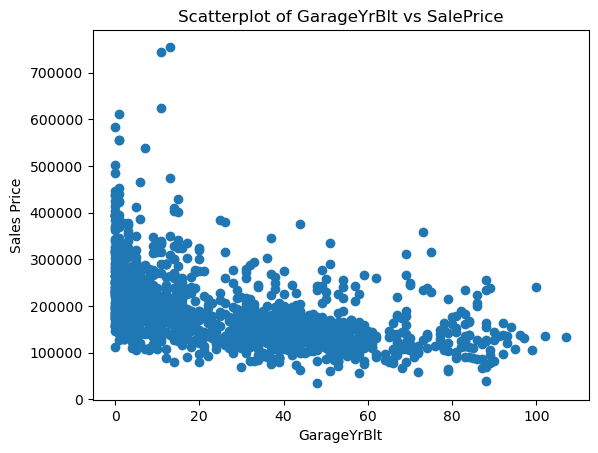

x-axis indictates the differece between YrSold and GarageYrBlt


In [17]:
#Calling function to ploting garage year build vs salesprice
plot('GarageYrBlt')

#### Observation:
As the age of garrage increases, the sales price decreases

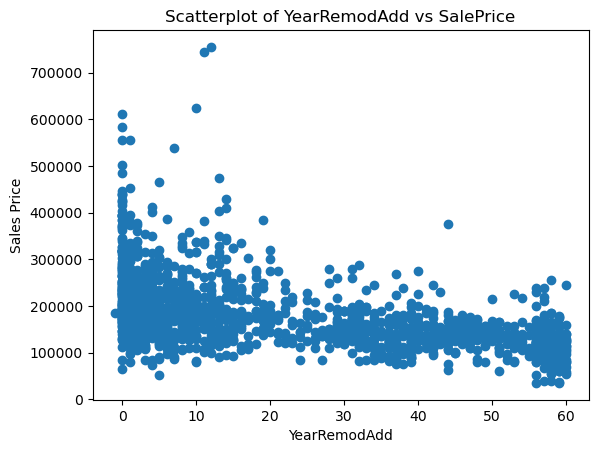

x-axis indictates the differece between YrSold and YearRemodAdd


In [18]:
#Calling function to ploting Remodel date vs salesprice
plot('YearRemodAdd')

#### Observation:
As the difference between year sold and Remodel date increases the sales price decreases

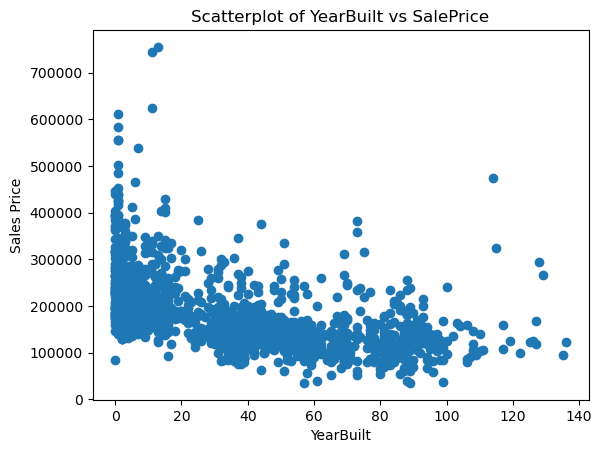

x-axis indictates the differece between YrSold and YearBuilt


In [19]:
#Calling function to ploting year built vs salesprice
plot('YearBuilt')

#### Observation:
As the age of the house increases the salesprice decreases

In [20]:
#Using the above info new features are created
data['Garage_Age'] = data['YrSold'] - data['GarageYrBlt']
data['Remodel_Age'] = data['YrSold'] - data['YearRemodAdd']
data['House_Age'] = data['YrSold'] - data['YearBuilt']

In [21]:
data.drop(['GarageYrBlt','YrSold','YearRemodAdd','YearBuilt'], axis = 1, inplace = True)

In [22]:
# Get the statistics of garage age
data.Garage_Age.describe()

count    1370.000000
mean       29.458394
std        24.723956
min         0.000000
25%         6.250000
50%        28.000000
75%        47.000000
max       107.000000
Name: Garage_Age, dtype: float64

In [23]:
data.Garage_Age.isnull().sum()

81

In [24]:
#replace the null values with 0
data.Garage_Age = data.Garage_Age.fillna(0)

In [25]:
data.Garage_Age = data.Garage_Age.astype('int64')

In [26]:
null_data_perc= round(((data.isnull().sum())/len(data))*100,2).sort_values(ascending = False)
print(null_data_perc)

MSSubClass       0.0
KitchenQual      0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenAbvGr     0.0
GarageQual       0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
GarageArea       0.0
GarageCond       0.0
1stFlrSF         0.0
MiscFeature      0.0
Remodel_Age      0.0
Garage_Age       0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
MoSold           0.0
MiscVal          0.0
Fence            0.0
PavedDrive       0.0
PoolQC           0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
2ndFlrSF         0.0
Electrical       0.0
MSZoning         0.0
LandSlope        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1   

All null values are handled!

In [27]:
# converting few variables as type objects
var_list = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
                'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                'GarageCars', 'MoSold']
for variable in var_list:
    data[variable] = data[variable].astype('object')

In [28]:
# Checking for outliers
data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Garage_Age,Remodel_Age,House_Age
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999,27.813921,23.055134,36.722950
std,22.044429,9992.987081,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273,24.957920,20.647244,30.238849
min,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,60.000000,7537.500000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,5.000000,4.000000,8.000000
50%,69.000000,9477.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000,24.000000,14.000000,35.000000
75%,79.000000,11600.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,46.000000,41.000000,54.500000
max,313.000000,215245.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,107.000000,60.000000,136.000000


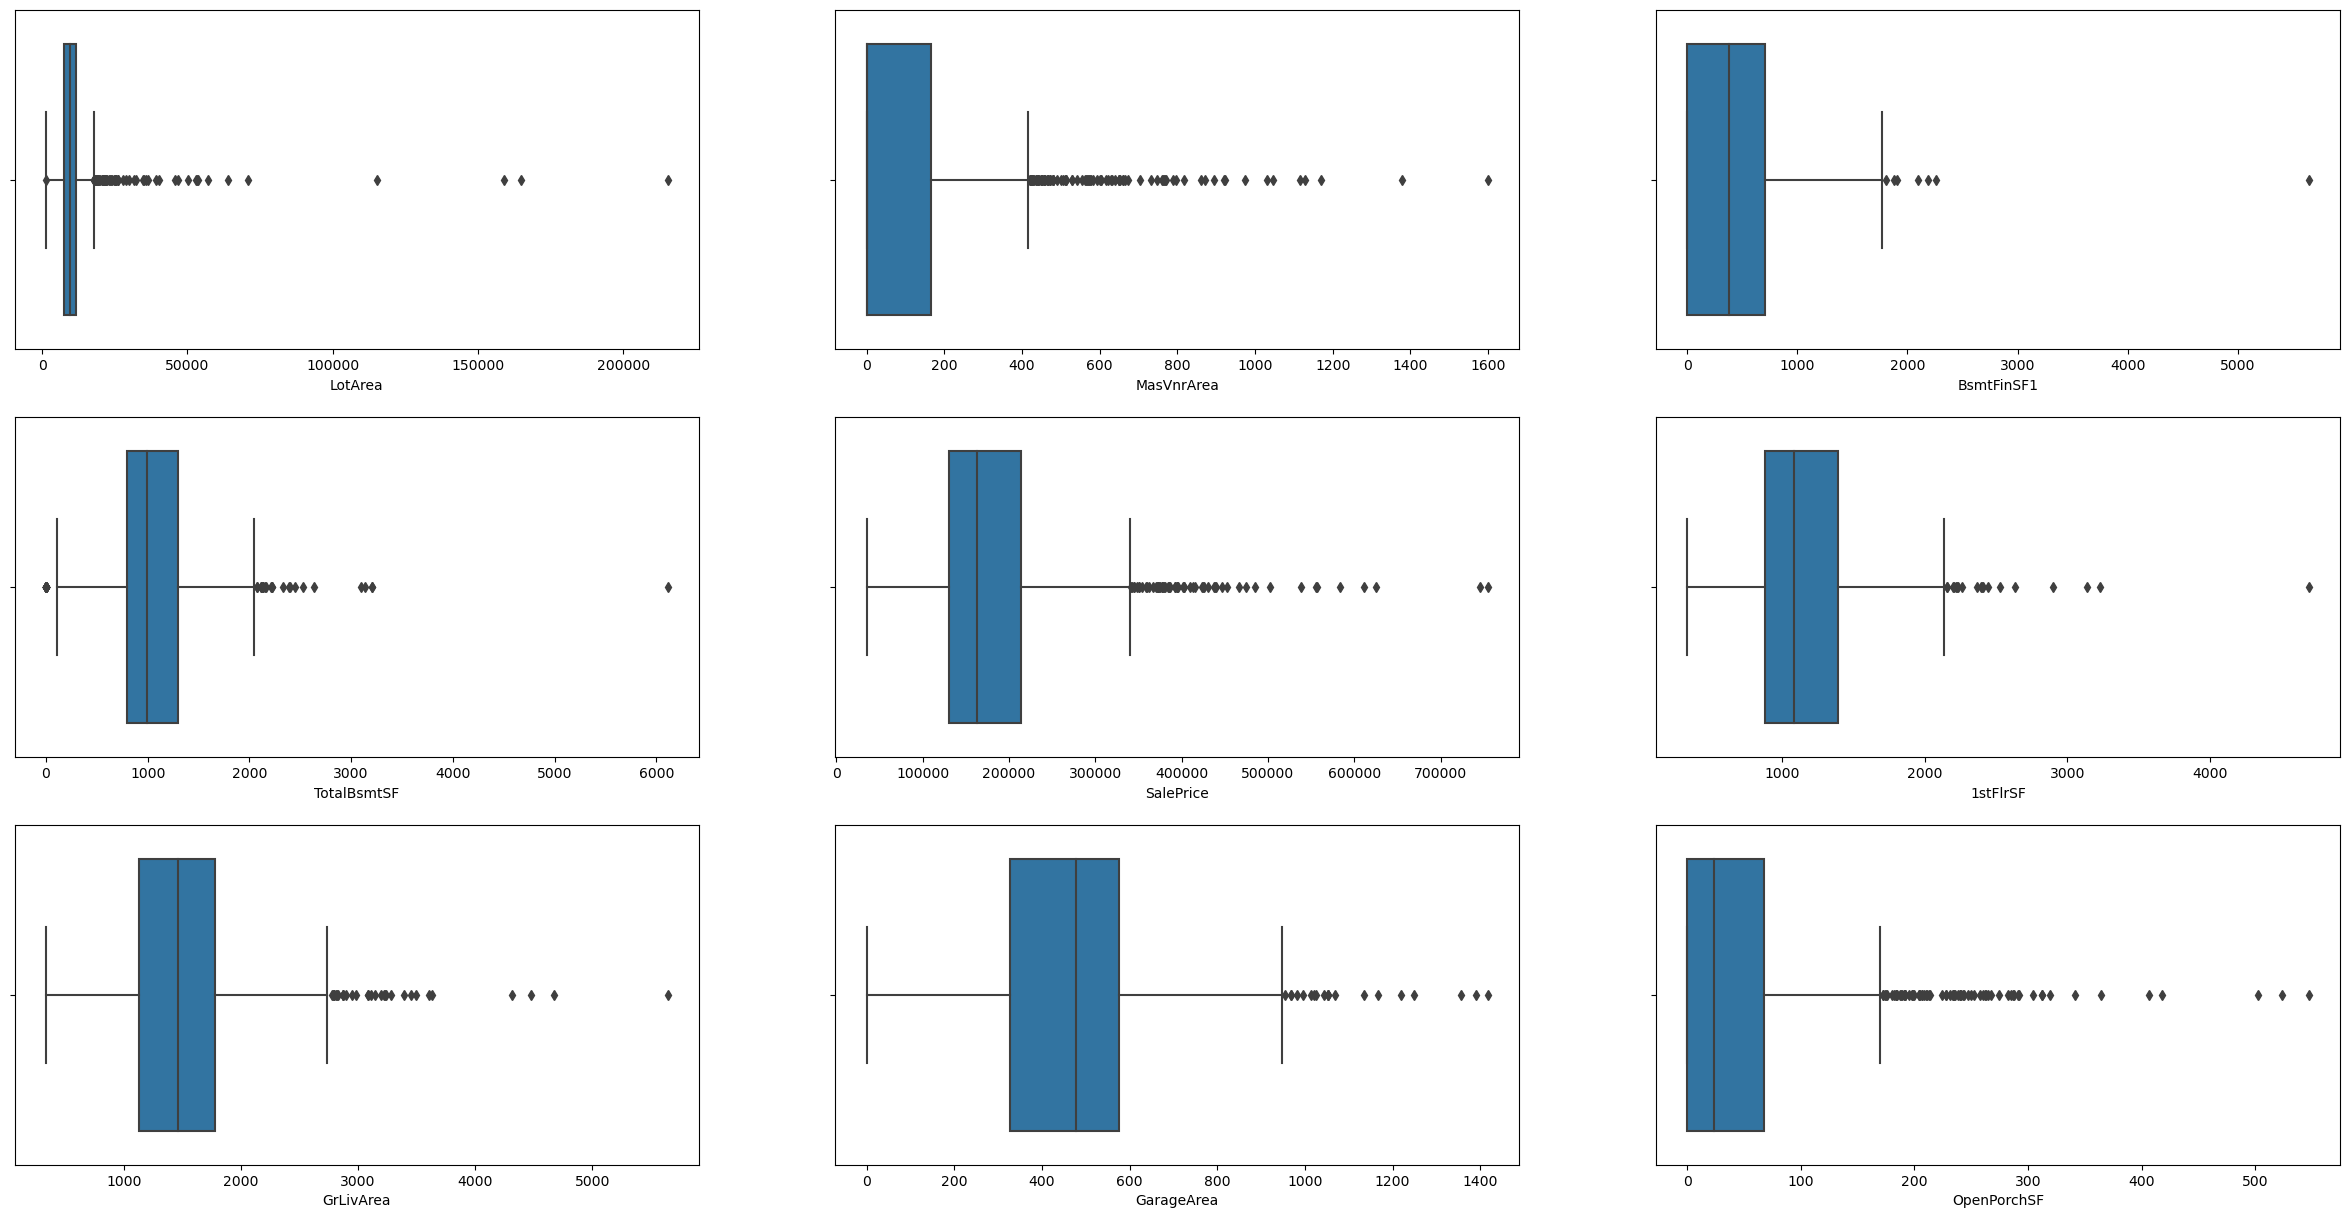

In [29]:
# Visualizing the outliers 
plt.subplots(figsize = [30,15])

plt.subplot(3,3,1)
sns.boxplot(x = 'LotArea', data=data)

plt.subplot(3,3,2)
sns.boxplot(x = 'MasVnrArea', data=data)

plt.subplot(3,3,3)
sns.boxplot(x ='BsmtFinSF1', data=data)

plt.subplot(3,3,4)
sns.boxplot(x = 'TotalBsmtSF', data=data)

plt.subplot(3,3,5)
sns.boxplot(x = 'SalePrice', data=data)

plt.subplot(3,3,6)
sns.boxplot(x = '1stFlrSF', data=data)

plt.subplot(3,3,7)
sns.boxplot(x = 'GrLivArea', data=data)

plt.subplot(3,3,8)
sns.boxplot(x = 'GarageArea', data=data)

plt.subplot(3,3,9)
sns.boxplot(x = 'OpenPorchSF', data=data)

plt.show()

#### Observations:
LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, OpenPorchSF, SalePrice are having outlier

In [30]:
#Treating outliers in the data using IQR
outlier_list = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                   'GarageArea', 'OpenPorchSF', 'SalePrice']
for variable in outlier_list:
    Quantile_1 = data[variable].quantile(0.05)
    Quantile_3 = data[variable].quantile(0.95)
    IQR = Quantile_3 - Quantile_1
    data = data[(data[variable] >=Quantile_1-1.5*IQR) & (data[variable]<=Quantile_3+1.5*IQR)]

In [31]:
data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Garage_Age,Remodel_Age,House_Age
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,69.527311,9736.740896,99.273109,430.336134,45.810924,568.781513,1044.928571,1151.675770,340.051120,5.975490,1497.702381,469.797619,92.029412,44.853641,22.190476,3.485994,14.654062,2.095938,42.817927,178332.963585,27.787115,23.124650,36.698179
std,20.865067,4139.142131,167.010684,425.661626,159.201918,443.252409,409.318497,365.656885,427.892467,49.157272,489.844373,212.082699,121.371665,61.462168,61.486869,29.639728,54.355271,35.728046,500.312556,74436.456346,24.932555,20.658735,30.191736
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,0.000000,0.000000,0.000000
25%,60.000000,7500.000000,0.000000,0.000000,0.000000,222.500000,793.750000,881.500000,0.000000,0.000000,1125.000000,323.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129500.000000,4.000000,4.000000,8.000000
50%,69.000000,9402.500000,0.000000,376.000000,0.000000,481.500000,988.000000,1080.000000,0.000000,0.000000,1456.000000,476.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161000.000000,24.000000,15.000000,35.000000
75%,79.000000,11446.500000,163.250000,700.000000,0.000000,808.000000,1276.250000,1377.250000,727.250000,0.000000,1767.250000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,211250.000000,46.000000,41.000000,55.000000
max,313.000000,36500.000000,1115.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,1818.000000,572.000000,3608.000000,1390.000000,736.000000,418.000000,552.000000,508.000000,440.000000,738.000000,15500.000000,611657.000000,107.000000,60.000000,136.000000


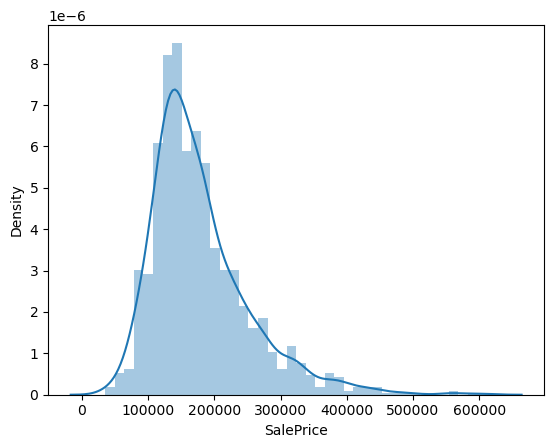

In [32]:
# plotting the distibution of SalePrice
sns.distplot(data['SalePrice'])
plt.show()

#### Observation:
salesprice is skew to the left 


In [33]:
# Taking log transform of saleprice
data['SalePrice_Transformed'] = np.log2(data['SalePrice'])

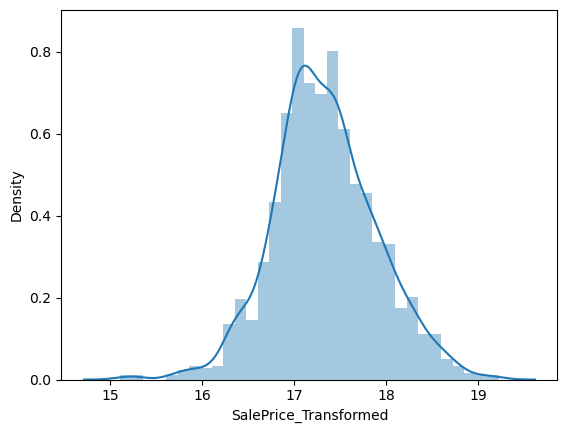

In [34]:
# plotting the distibution of SalePrice after transformation
sns.distplot(data['SalePrice_Transformed'])
plt.show()

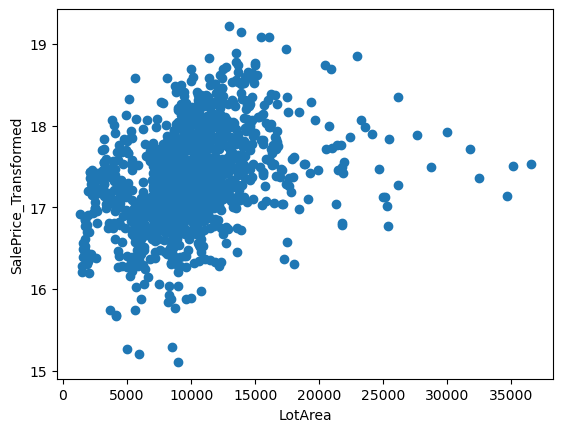

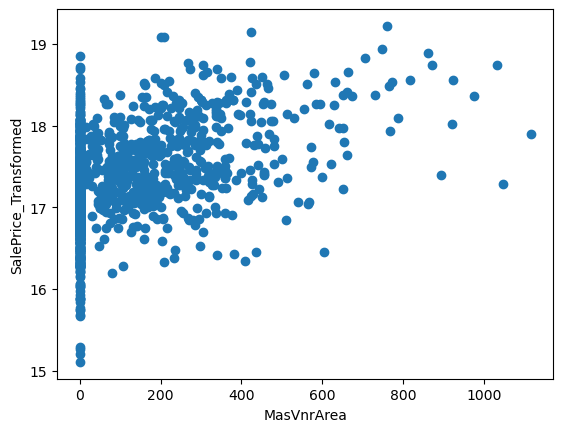

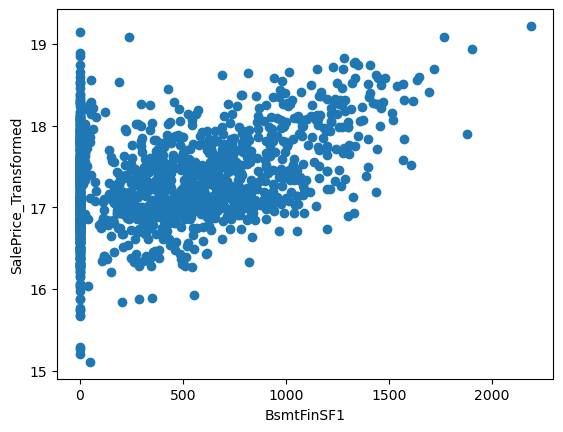

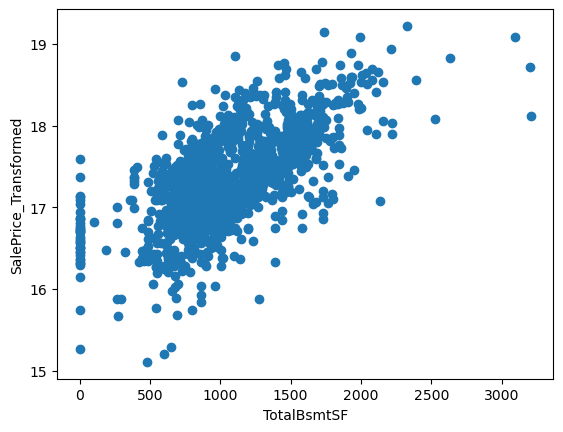

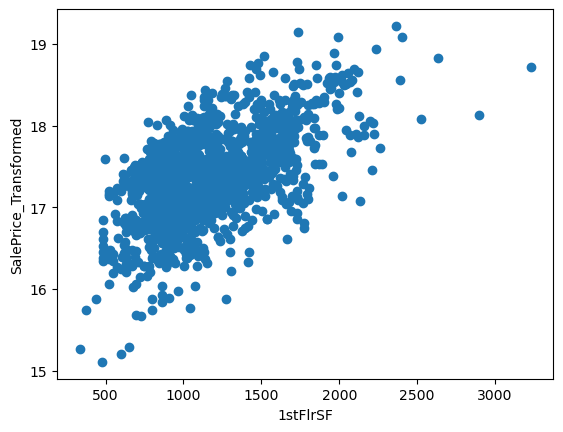

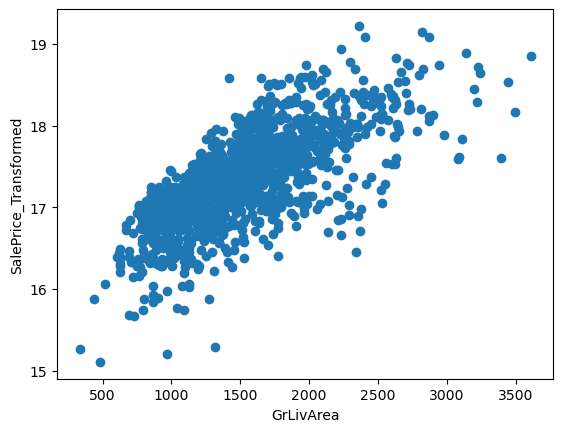

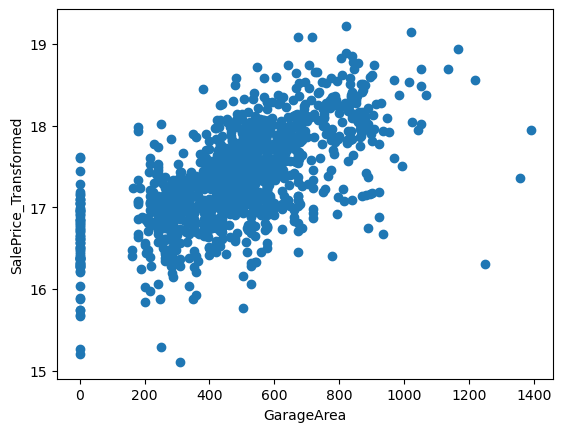

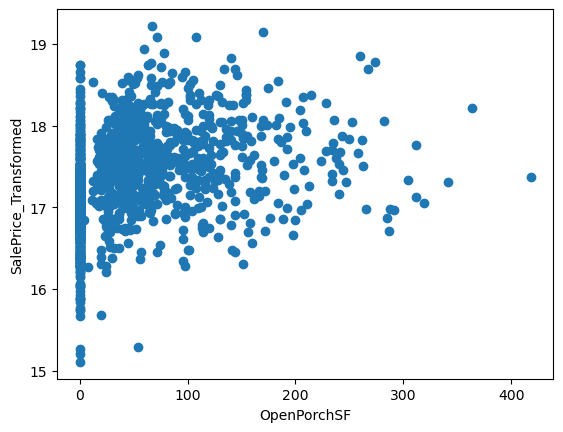

In [35]:
# Plotting scatterplot between various features and SalePrice
for variable in outlier_list:
    if variable!='SalePrice':
        plt.scatter(data[variable], data['SalePrice_Transformed'])
        plt.xlabel(variable)
        plt.ylabel('SalePrice_Transformed')
        plt.show()

In [36]:
#Removing the un transformed variable
data.drop('SalePrice',axis = 1,inplace=True)

In [37]:
#Taking numeric variables
numeric_vars = data.select_dtypes(include = ['float64', 'int64'])
numeric_vars.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Garage_Age,Remodel_Age,House_Age,SalePrice_Transformed
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,5,5,5,17.669688
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,31,31,31,17.469610
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,7,6,7,17.769915
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,8,36,91,17.095067
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,8,8,8,17.931569


In [38]:
# View Correlation Matrix
cor = numeric_vars.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Garage_Age,Remodel_Age,House_Age,SalePrice_Transformed
LotFrontage,1.000000,0.533866,0.162745,0.119928,0.037286,0.132700,0.282920,0.355564,0.046999,0.041966,0.310686,0.301283,0.069720,0.114333,0.017598,0.068034,0.051852,0.063692,0.001938,-0.026064,-0.076815,-0.110206,0.343868
LotArea,0.533866,1.000000,0.133062,0.177238,0.073576,0.074098,0.293173,0.391140,0.095653,0.034580,0.379002,0.315747,0.162352,0.150402,0.005328,0.071986,0.114800,0.091591,0.047605,0.034280,-0.027953,-0.047576,0.375237
MasVnrArea,0.162745,0.133062,1.000000,0.232011,-0.068933,0.128057,0.353137,0.336127,0.131128,-0.072307,0.358199,0.373652,0.153743,0.131403,-0.109995,0.023660,0.051089,-0.016145,-0.030355,-0.205711,-0.171835,-0.317968,0.435399
BsmtFinSF1,0.119928,0.177238,0.232011,1.000000,-0.053581,-0.528076,0.447232,0.373006,-0.193176,-0.066095,0.103062,0.259687,0.177401,0.070286,-0.104308,0.032341,0.072348,0.017636,0.004098,-0.105583,-0.120148,-0.245575,0.369730
BsmtFinSF2,0.037286,0.073576,-0.068933,-0.053581,1.000000,-0.204998,0.111230,0.099764,-0.092823,0.015738,-0.005033,-0.016393,0.076524,0.019440,0.039329,-0.030190,0.099706,0.054801,0.005529,0.090194,0.068134,0.046499,-0.001808
BsmtUnfSF,0.132700,0.074098,0.128057,-0.528076,-0.204998,1.000000,0.454010,0.342370,-0.000247,0.027973,0.258163,0.188983,0.004577,0.128676,-0.003442,0.020524,-0.018674,-0.031712,-0.025281,-0.177930,-0.185911,-0.158066,0.233827
TotalBsmtSF,0.282920,0.293173,0.353137,0.447232,0.111230,0.454010,1.000000,0.797455,-0.237259,-0.032320,0.384785,0.468330,0.219205,0.219997,-0.096903,0.044115,0.093795,0.005314,-0.020965,-0.267399,-0.299769,-0.408465,0.637002
1stFlrSF,0.355564,0.391140,0.336127,0.373006,0.099764,0.342370,0.797455,1.000000,-0.261029,-0.011583,0.517297,0.470812,0.220082,0.184965,-0.067000,0.063511,0.095881,0.033598,-0.023666,-0.183839,-0.245733,-0.291671,0.609801
2ndFlrSF,0.046999,0.095653,0.131128,-0.193176,-0.092823,-0.000247,-0.237259,-0.261029,1.000000,0.067336,0.685433,0.119910,0.076329,0.195819,0.073503,-0.023221,0.020055,0.039558,0.014736,-0.046387,-0.133711,-0.003195,0.299904
LowQualFinSF,0.041966,0.034580,-0.072307,-0.066095,0.015738,0.027973,-0.032320,-0.011583,0.067336,1.000000,0.150526,-0.067096,-0.024352,0.023473,0.060935,-0.004611,0.028712,0.072946,-0.003640,-0.012565,0.060176,0.184041,-0.036319


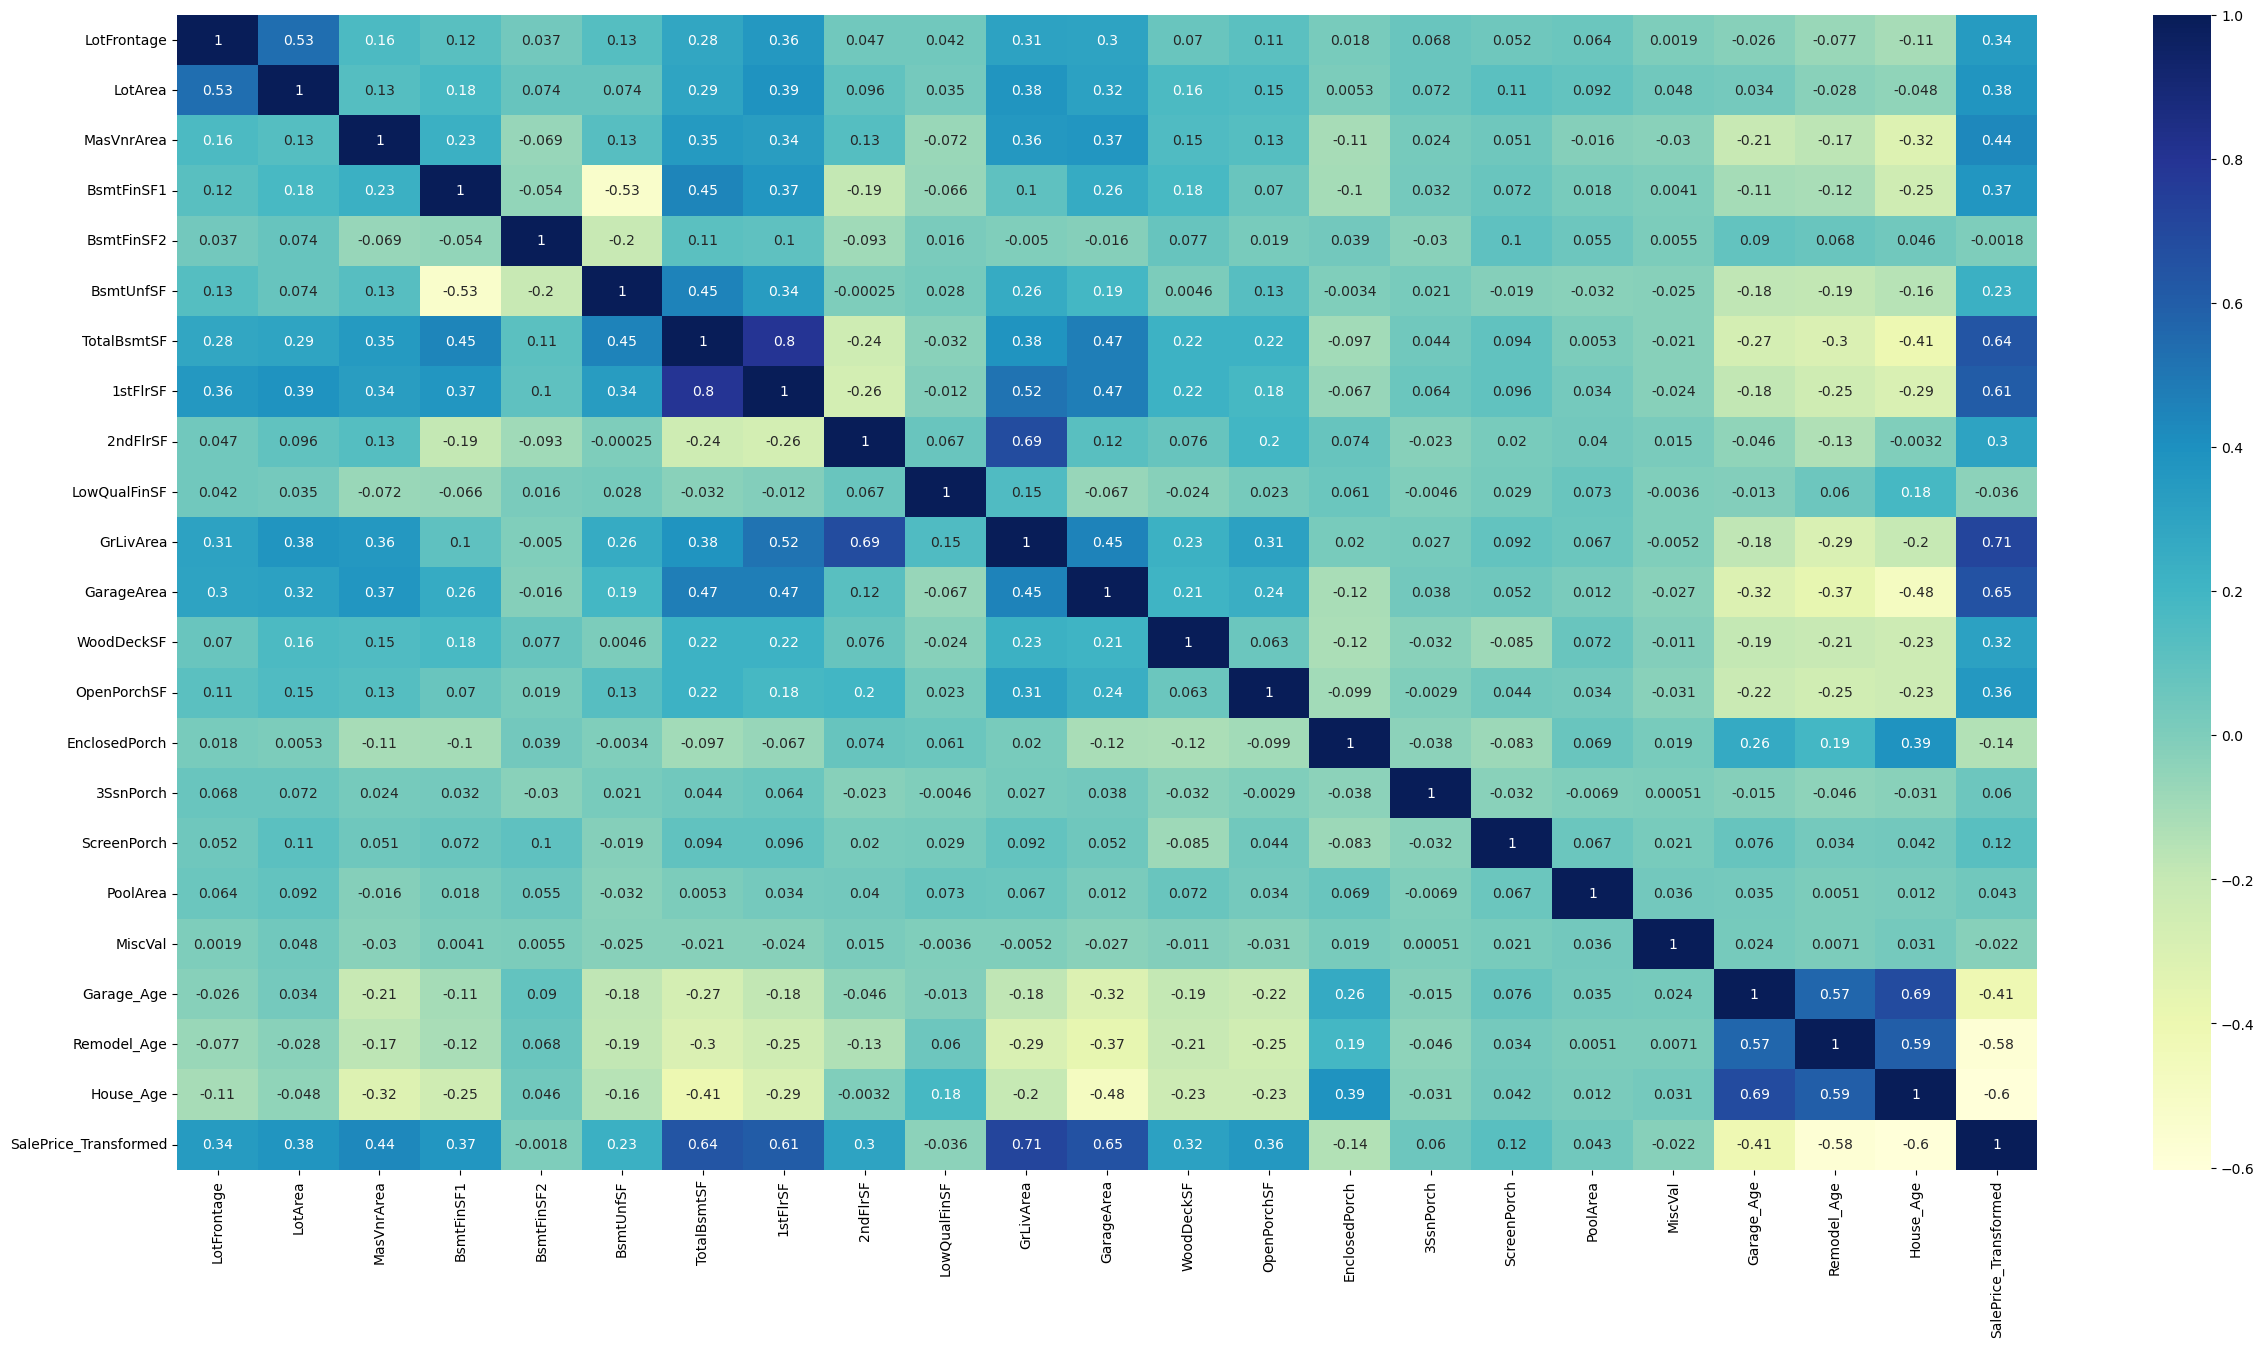

In [39]:
#Ploting heatmap 
plt.figure(figsize = [30,15])
sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()

## Step 3: Data Preparation

In [40]:
#Mapping values
caterogical_vars= data.select_dtypes(include = ['object'])
caterogical_vars.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [41]:
data['PoolQC'].value_counts()

No Pool    1423
Fa            2
Gd            2
Ex            1
Name: PoolQC, dtype: int64

In [42]:
#Mapping values to numerical values
data['LotShape'] = data['LotShape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
data['LandSlope'] = data['LandSlope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
data['ExterQual'] = data['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['ExterCond'] = data['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['BsmtQual'] = data['BsmtQual'].map({'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['BsmtCond'] = data['BsmtCond'].map({'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['BsmtExposure'] = data['BsmtExposure'].map({'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'No Basement': 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6 })
data['BsmtFinType2'] = data['BsmtFinType2'].map({'No Basement': 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6 })
data['HeatingQC'] = data['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['KitchenQual'] = data['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['Functional'] = data['Functional'].map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
data['FireplaceQu'] = data['FireplaceQu'].map({'No Fireplace':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['GarageFinish'] = data['GarageFinish'].map({'No Garage':0, 'Unf':1, 'RFn':2, 'Fin':3})
data['GarageQual'] = data['GarageQual'].map({'No Garage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 })
data['GarageCond'] = data['GarageCond'].map({'No Garage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 })
data['PoolQC'] = data['PoolQC'].map({'No Pool':0, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data['Fence'] = data['Fence'].map({'No Fence':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [43]:
# Taking count of Street
data['Street'].value_counts()

Pave    1423
Grvl       5
Name: Street, dtype: int64

In [44]:
# Taking count of Utilites
data['Utilities'].value_counts()

AllPub    1427
NoSeWa       1
Name: Utilities, dtype: int64

In [45]:
# Taking count of Central Air
data['CentralAir'].value_counts()

Y    1334
N      94
Name: CentralAir, dtype: int64

In [46]:
# Applying binary values to categorical variables
data['Street'] = data['Street'].map({'Pave': 1, 'Grvl': 0})
data['Utilities'] = data['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})
data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})

In [47]:
#View the data
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Garage_Age,Remodel_Age,House_Age,SalePrice_Transformed
0,60,RL,65.0,8450,1,No alley access,4,Lvl,1,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,WD,Normal,5,5,5,17.669688
1,20,RL,80.0,9600,1,No alley access,4,Lvl,1,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,WD,Normal,31,31,31,17.469610
2,60,RL,68.0,11250,1,No alley access,3,Lvl,1,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,WD,Normal,7,6,7,17.769915
3,70,RL,60.0,9550,1,No alley access,3,Lvl,1,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,WD,Abnorml,8,36,91,17.095067
4,60,RL,84.0,14260,1,No alley access,3,Lvl,1,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,WD,Normal,8,8,8,17.931569


In [48]:
categorical_vars_list = ['MSSubClass', 'MSZoning','Alley','LandContour','LotConfig','LandSlope','Neighborhood', 'Condition1',
                   'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                   'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature',
                   'SaleType', 'SaleCondition']

In [49]:
#Checking shape of data
data.shape

(1428, 79)

In [50]:
# creating dummy variables for selected categorical variables
data = pd.get_dummies(data=data, columns=['MSSubClass', 'MSZoning','Alley','LandContour','LotConfig','LandSlope','Neighborhood', 'Condition1',
                   'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                   'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature',
                   'SaleType', 'SaleCondition'],drop_first=True)

In [51]:
#Checking shape of data
data.shape

(1428, 214)

In [52]:
# view the data
data.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Garage_Age,Remodel_Age,House_Age,SalePrice_Transformed,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_2,LandSlope_3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,4,1,7,5,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2,2,548,3,3,0,61,0,0,0,0,0,0,0,2,5,5,5,17.669688,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,4,1,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,2,2,460,3,3,298,0,0,0,0,0,0,0,0,5,31,31,31,17.469610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,

In [53]:
# feature scaling
scaler = StandardScaler()

In [54]:
# Listing the numberic values
numeric_vars.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Garage_Age',
       'Remodel_Age', 'House_Age', 'SalePrice_Transformed'],
      dtype='object')

In [55]:
#scaling the numeric variables
numeric_var_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Garage_Age',
       'Remodel_Age', 'House_Age', 'SalePrice_Transformed']
data[numeric_var_list] = scaler.fit_transform(data[numeric_var_list])

In [56]:
data.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Garage_Age,Remodel_Age,House_Age,SalePrice_Transformed,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_2,LandSlope_3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.217056,-0.310980,1,4,1,7,5,0.579369,4,3,4,3,1,6,0.647840,1,-0.287854,-0.945123,-0.461730,5,1,-0.808899,1.201538,-0.121601,0.433550,1,0,2,1,3,1,4,8,8,0,0,2,2,0.368864,3,3,-0.758510,0.262796,-0.361024,-0.117653,-0.269692,-0.058684,0,0,-0.085612,2,-0.914270,-0.877643,-1.050264,0.599005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.502100,-0.033048,1,4,1,6,8,-0.594620,3,3,

In [57]:
# Splitting to X and y
X = data.drop('SalePrice_Transformed',axis =1)
y = data['SalePrice_Transformed']

## Step 4: Model Building

In [58]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [59]:
#view the train data
X_train.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Garage_Age,Remodel_Age,House_Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_2,LandSlope_3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
733,0.502100,0.063625,1,4,1,5,6,-0.594620,3,3,3,3,1,4,0.384628,1,-0.287854,-0.674302,-0.442179,5,1,-0.020999,-0.794990,-0.121601,-0.722324,1,0,1,0,3,1,3,6,8,1,3,2,1,-0.970705,3,3,0.601427,-0.730032,-0.361024,-0.117653,-0.269692,-0.058684,0,2,0.714168,3,0.810987,0.139232,0.374466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1315,0.741819,0.323431,1,4,1,6,5,-0.594620,3,3,2,3,2,5,0.163718,2,1.446400,-

In [60]:
#view the shape of train data
X_train.shape

(999, 213)

## Step 5: Ridge Regression

In [61]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# optimal value for hyperparamter
print(model_cv.best_params_)

{'alpha': 10.0}


In [63]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.026623    0.05404232  0.08911068  0.00682562  0.03707762  0.12002911
  0.10543086  0.01771847  0.02848602 -0.08126613 -0.00590717 -0.01406755
  0.02522546  0.00779339  0.09250681 -0.00024744  0.01668265  0.00321766
  0.10617342  0.02579115  0.11955243  0.08192856  0.13005749  0.01453991
  0.17622558  0.03735564  0.02328279  0.05230213  0.04919536 -0.02215826
 -0.07379377  0.0503092   0.01388652  0.07942008  0.02288141  0.01697307
  0.00669355  0.03203615  0.05329465  0.05661947 -0.02922824  0.02667907
  0.02958585  0.02216194  0.00342252  0.04182377  0.02647578  0.00656664
 -0.00032224 -0.00120634 -0.00489604  0.00424412 -0.03116285 -0.17176605
 -0.0860575   0.02735394  0.01647452 -0.00187701 -0.00088928  0.14840666
 -0.02801454  0.01459761  0.00922273 -0.01262064 -0.01399584 -0.10746776
 -0.03295243 -0.0204048   0.10934893  0.05954314  0.10559155  0.0025647
  0.00145245  0.08348395  0.03194465 -0.00967265  0.00943646  0.05930184
 -0.04725033  0.00501809 -0.02058312  0.00437864 -0.

In [64]:
# calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9393539348848496
0.9142095492915212
58.259936201244315
39.70584021876324
0.05831825445570001
0.09255440610434322


## Step 6: Lasso Regression

In [65]:
# hyperparameter tuning
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# optimal value of hyperparameter
print(model_cv.best_params_)

{'alpha': 0.001}


In [67]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [68]:
# Lasso coefficients
lasso.coef_

array([ 0.02665677,  0.051051  ,  0.10424955,  0.00175625,  0.        ,
        0.12234418,  0.10817816,  0.01467736,  0.02305069, -0.07102758,
       -0.00051178, -0.01393437,  0.02499425,  0.00548294,  0.09582091,
        0.        ,  0.01714595, -0.        ,  0.10322316,  0.02582975,
        0.10773706,  0.        ,  0.01182153,  0.        ,  0.30672359,
        0.02931993,  0.        ,  0.02889545,  0.03231268, -0.01037833,
       -0.09859484,  0.05202991,  0.01042037,  0.08073787,  0.01340776,
        0.01946767,  0.0039124 ,  0.02516483,  0.05827614,  0.03513926,
       -0.        ,  0.02637904,  0.0274029 ,  0.02098526,  0.00036014,
        0.03996752,  0.02524045,  0.        ,  0.        , -0.00286905,
       -0.00462151,  0.00200436, -0.02772234, -0.18805604, -0.05574952,
        0.        ,  0.        ,  0.        , -0.        ,  0.16526706,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.13217253, -0.        , -0.        ,  0.16816508,  0.02

In [69]:
# calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.937241653727865
0.9160194534214162
60.28910932585434
38.868173979695584
0.06034945878463898
0.09060180414847456


In [70]:
# Creating a table which contains all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)']}
lr_metric = pd.DataFrame(lr_table, columns = ['Metric'])                       
rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.939354,0.937242
1,R2 Score (Test),0.914210,0.916019
2,RSS (Train),58.259936,60.289109
3,RSS (Test),39.705840,38.868174
4,MSE (Train),0.241492,0.245661
5,MSE (Test),0.304228,0.301001


In [71]:
# Observe the coefficients of both Ridge and Lasso models
betas = pd.DataFrame(index = X.columns)
betas.rows = X.columns

In [72]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [73]:
betas

,Ridge,Lasso
LotFrontage,0.026623,0.026657
LotArea,0.054042,0.051051
Street,0.089111,0.104250
LotShape,0.006826,0.001756
Utilities,0.037078,0.000000
OverallQual,0.120029,0.122344
OverallCond,0.105431,0.108178
MasVnrArea,0.017718,0.014677
ExterQual,0.028486,0.023051
ExterCond,-0.081266,-0.071028


In [74]:
# Top 5 features for Lasso Model
abs(betas['Lasso']).sort_values(ascending = False)

GrLivArea                0.306724
Neighborhood_Crawfor     0.226875
SaleCondition_Normal     0.203312
Exterior1st_BrkFace      0.193019
House_Age                0.188056
MSZoning_FV              0.168165
MSSubClass_70            0.165267
Neighborhood_MeadowV     0.154829
Heating_Grav             0.152776
Condition1_RRAe          0.152531
SaleCondition_Partial    0.145348
MSSubClass_160           0.132173
SaleType_New             0.130701
Neighborhood_BrkSide     0.128429
OverallQual              0.122344
MSZoning_RL              0.118996
Neighborhood_NridgHt     0.116991
OverallCond              0.108178
CentralAir               0.107737
Street                   0.104250
TotalBsmtSF              0.103223
KitchenAbvGr             0.098595
BsmtFinSF1               0.095821
Neighborhood_Mitchel     0.091858
Neighborhood_ClearCr     0.086519
Condition1_Norm          0.085888
Foundation_PConc         0.085751
Functional               0.080738
Alley_Pave               0.076902
Neighborhood_E

## Conclusion:

From the analysis we can see both the models are having almost same scores. But lasso regression model can be selected as it performs feature selection. 

### Top 5 Features:
Top 5 features drived after analysis are as follows:
 1. GrLivArea                
 2. Neighborhood_Crawfor     
 3. SaleCondition_Normal     
 4. Exterior1st_BrkFace      
 5. House_Age




## Problem Statement - Part II

**Q1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [75]:
# rebuilding ridge regression model with double alpha value
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.78256369e-02  5.36838211e-02  5.50073026e-02  4.45482538e-03
  2.01215942e-02  1.26396179e-01  1.05229628e-01  1.77673592e-02
  3.35446392e-02 -7.24756032e-02 -1.30068302e-04 -1.69120524e-02
  2.55841815e-02  7.87198640e-03  9.29812063e-02 -2.02729738e-03
  1.75236057e-02  2.32625314e-03  1.06028535e-01  2.83618111e-02
  1.01153514e-01  8.56085675e-02  1.19010723e-01  1.24958726e-02
  1.69117829e-01  3.20690333e-02  1.77854950e-02  4.94847753e-02
  4.51164751e-02 -1.68735483e-02 -6.29468727e-02  5.12864318e-02
  1.45850007e-02  7.86081210e-02  2.62998231e-02  1.82538342e-02
  8.98169472e-03  3.22020287e-02  5.33959045e-02  4.49946364e-02
 -1.19113198e-02  2.62718969e-02  2.86922322e-02  2.18407373e-02
  3.40814386e-03  4.13051509e-02  2.44730977e-02  6.06992877e-03
 -2.81184508e-04 -1.78262618e-03 -4.44239674e-03  3.41933574e-03
 -3.28468084e-02 -1.58458322e-01 -7.48734340e-02  1.64168859e-02
  1.43299904e-02 -6.54644481e-04  9.74709470e-04  1.15979185e-01
 -1.81205354e-02  9.64278

In [76]:
# calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9362594595757014
0.9153502162877516
61.23265889553607
39.177912679962404
0.06129395284838445
0.09132380578079814


In [77]:
# rebuilding lasso regression model with double alpha value

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [78]:
# Lasso coefficients
lasso.coef_

array([ 2.55471980e-02,  5.14306036e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.33492308e-01,  1.08074563e-01,  1.39029642e-02,
        2.75548386e-02, -5.64051978e-02, -0.00000000e+00, -1.17597905e-02,
        2.43958639e-02,  4.28826139e-03,  9.97458412e-02, -0.00000000e+00,
        1.69683407e-02, -0.00000000e+00,  1.02929173e-01,  2.93943756e-02,
        9.54598034e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.20933540e-01,  1.96765000e-02,  0.00000000e+00,  8.56994755e-03,
        1.84612027e-02, -2.37189439e-03, -6.77942335e-02,  5.20059781e-02,
        6.06237134e-03,  7.94601426e-02,  9.21184483e-03,  2.22361226e-02,
        9.61420757e-03,  2.69708686e-02,  5.48473547e-02,  4.45907178e-02,
        0.00000000e+00,  2.38278614e-02,  2.54682269e-02,  2.03586883e-02,
        0.00000000e+00,  3.83026194e-02,  1.79792549e-02,  0.00000000e+00,
       -0.00000000e+00, -1.62474802e-03, -3.66468218e-03,  1.96766941e-04,
       -2.72778472e-02, -

In [79]:
# calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.932426008598144
0.9173813221657476
64.91528214502537
38.23786906446558
0.0649802624074328
0.08913256192183118


In [80]:
# Creating a table which contains all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)']}
lr_metric = pd.DataFrame(lr_table, columns = ['Metric'])                       
rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.936259,0.932426
1,R2 Score (Test),0.915350,0.917381
2,RSS (Train),61.232659,64.915282
3,RSS (Test),39.177913,38.237869
4,MSE (Train),0.247576,0.254912
5,MSE (Test),0.302198,0.298551


In [81]:
# Observe the coefficients of both Ridge and Lasso models
betas = pd.DataFrame(index = X.columns)
betas.rows = X.columns

In [82]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [83]:
betas

,Ridge,Lasso
LotFrontage,0.027826,0.025547
LotArea,0.053684,0.051431
Street,0.055007,0.000000
LotShape,0.004455,0.000000
Utilities,0.020122,0.000000
OverallQual,0.126396,0.133492
OverallCond,0.105230,0.108075
MasVnrArea,0.017767,0.013903
ExterQual,0.033545,0.027555
ExterCond,-0.072476,-0.056405


In [84]:
# Top predictors using lasso regression
betas['Lasso'].sort_values(ascending = False)

GrLivArea                0.320934
Neighborhood_Crawfor     0.192543
SaleCondition_Normal     0.181744
Exterior1st_BrkFace      0.175034
SaleCondition_Partial    0.138702
MSZoning_FV              0.135833
OverallQual              0.133492
MSSubClass_70            0.126545
Neighborhood_BrkSide     0.123646
SaleType_New             0.122291
MSZoning_RL              0.110816
OverallCond              0.108075
TotalBsmtSF              0.102929
BsmtFinSF1               0.099746
CentralAir               0.095460
Neighborhood_NridgHt     0.088596
Foundation_PConc         0.086792
Condition1_Norm          0.086664
Functional               0.079460
GarageArea               0.054847
KitchenQual              0.052006
LotArea                  0.051431
GarageQual               0.044591
Exterior1st_MetalSd      0.038823
ScreenPorch              0.038303
LotConfig_CulDSac        0.034927
Alley_Pave               0.030261
HeatingQC                0.029394
Exterior1st_VinylSd      0.028040
ExterQual     

In [85]:
# Top predictors using ridge regression
betas['Ridge'].sort_values(ascending = False)

GrLivArea                0.169118
SaleCondition_Normal     0.161631
Neighborhood_Crawfor     0.144693
Exterior1st_BrkFace      0.131369
OverallQual              0.126396
2ndFlrSF                 0.119011
MSSubClass_70            0.115979
TotalBsmtSF              0.106029
OverallCond              0.105230
SaleType_New             0.102787
SaleCondition_Partial    0.102787
CentralAir               0.101154
BsmtFinSF1               0.092981
Condition1_Norm          0.092698
Neighborhood_BrkSide     0.089745
Neighborhood_NridgHt     0.088602
1stFlrSF                 0.085609
MSZoning_RL              0.082581
Functional               0.078608
Foundation_PConc         0.078081
MSZoning_FV              0.076371
Alley_Pave               0.062894
Neighborhood_ClearCr     0.059214
Street                   0.055007
Exterior2nd_Wd Sdng      0.054900
LotArea                  0.053684
GarageArea               0.053396
KitchenQual              0.051286
LotConfig_CulDSac        0.049909
FullBath      

**Q3.After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [86]:
# Dropping the 5 features selected using the lasso regression model from X_train
X_train_new = X_train.drop(['GrLivArea','Neighborhood_Crawfor','SaleCondition_Normal','Exterior1st_BrkFace','House_Age'], axis = 1)

In [87]:
# Dropping the 5 features selected using the lasso regression model from X_test 
X_test_new = X_test.drop(['GrLivArea','Neighborhood_Crawfor','SaleCondition_Normal','Exterior1st_BrkFace','House_Age'], axis = 1)

In [88]:
y_train_new = y_train.copy()

In [89]:
y_test_new = y_test.copy()

In [90]:
# Lasso Model
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train_new) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [92]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train_new)

Lasso(alpha=0.001)

In [93]:
# Coefficients
lasso.coef_

array([ 0.02869861,  0.05063652,  0.        , -0.        ,  0.        ,
        0.13691029,  0.0971983 ,  0.0093786 ,  0.03296128, -0.07550229,
        0.00038868, -0.02555857,  0.02546674,  0.009424  ,  0.09406915,
        0.        ,  0.01434115, -0.        ,  0.11601977,  0.03196958,
        0.15652382,  0.21358787,  0.25983592,  0.01634928,  0.02662121,
        0.        ,  0.0807656 ,  0.07292291, -0.01615031, -0.08386387,
        0.04807321,  0.        ,  0.07801036,  0.02050513,  0.02229502,
        0.01186361,  0.03678447,  0.05271694,  0.05578092,  0.        ,
        0.02581175,  0.02362202,  0.01242407,  0.00245635,  0.03443445,
        0.02821375,  0.        , -0.0019275 , -0.002053  , -0.00419003,
       -0.01127629, -0.04410712, -0.15028102,  0.        ,  0.        ,
       -0.03983116,  0.        ,  0.07390421, -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.14169982, -0.        ,
       -0.01652607,  0.15983365,  0.        ,  0.11070214,  0.  

In [94]:
# calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_new = lasso.predict(X_train_new)
y_pred_test_new = lasso.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train_new, y_pred_train_new)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test_new, y_pred_test_new)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_new - y_pred_train_new))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_new - y_pred_test_new))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_new, y_pred_train_new)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_new, y_pred_test_new)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9292585177787116
0.9126328900304044
67.95814754293318
40.43555524163993
0.06802617371664983
0.09425537352363621


In [95]:
# Coefficient for Lasso models
betas_new = pd.DataFrame(index = X_train_new.columns)
betas_new.rows = X_train_new.columns

In [96]:
betas_new['Lasso'] = lasso.coef_

In [97]:
betas_new['Lasso'].sort_values(ascending = False)

2ndFlrSF                 0.259836
1stFlrSF                 0.213588
MSZoning_FV              0.159834
CentralAir               0.156524
SaleType_New             0.145559
OverallQual              0.136910
Neighborhood_NridgHt     0.130737
Foundation_PConc         0.124739
TotalBsmtSF              0.116020
MSZoning_RL              0.110702
OverallCond              0.097198
Exterior2nd_Wd Sdng      0.097071
BsmtFinSF1               0.094069
Condition1_Norm          0.091283
FullBath                 0.080766
Functional               0.078010
LotConfig_CulDSac        0.076348
MSSubClass_70            0.073904
HalfBath                 0.072923
Neighborhood_ClearCr     0.072917
GarageQual               0.055781
Electrical_FuseF         0.055654
GarageArea               0.052717
LotArea                  0.050637
KitchenQual              0.048073
MasVnrType_Stone         0.042854
Neighborhood_Somerst     0.042308
Alley_Pave               0.037477
GarageCars               0.036784
ScreenPorch   

### Top 5 Features:
Top 5 features drived after removing the actual 5 predictor variables
 1. 2ndFlrSF                
 2. 1stFlrSF     
 3. MSZoning_FV     
 4. CentralAir      
 5. SaleType_New